In [317]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [318]:
bankData = pd.read_csv('bank_marketing_part1_Data.csv')

In [319]:
bankData.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [320]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [321]:
bankData.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [6]:
bankData.shape

(210, 7)

In [7]:
bankData.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

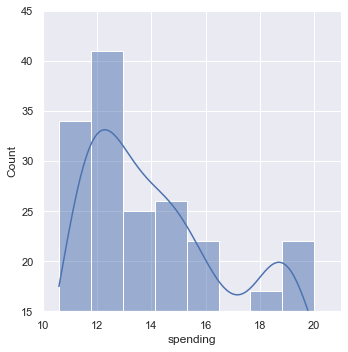

In [8]:
sns.displot(x=bankData['spending'], kind='hist', kde=True)
plt.xlim(10,21)
plt.ylim(15,45)
plt.show()

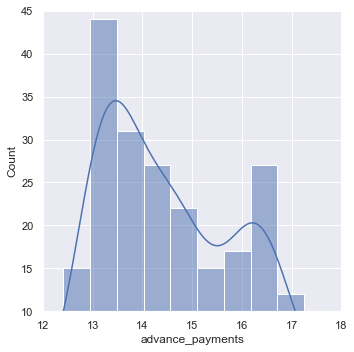

In [9]:
sns.displot(x=bankData['advance_payments'], kind='hist', kde=True)
plt.xlim(12,18)
plt.ylim(10,45)
plt.show()

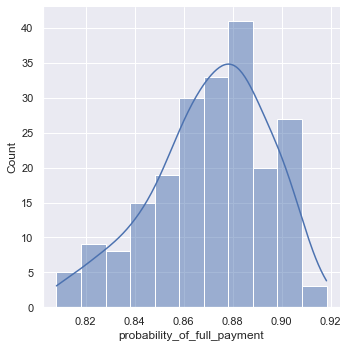

In [10]:
sns.displot(x=bankData['probability_of_full_payment'], kind='hist', kde=True)
plt.show()

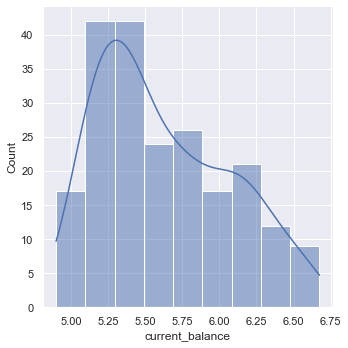

In [11]:
sns.displot(x=bankData['current_balance'], kind='hist', kde=True)
plt.show()

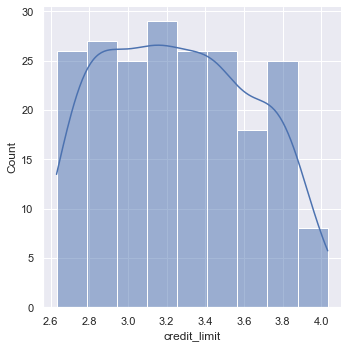

In [12]:
sns.displot(x=bankData['credit_limit'], kind='hist', kde=True)
plt.show()

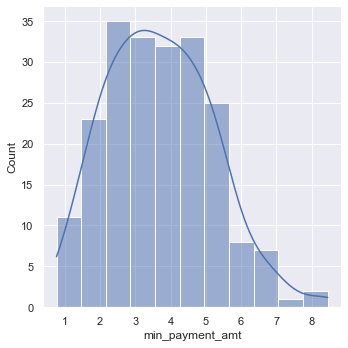

In [13]:
sns.displot(x=bankData['min_payment_amt'], kind='hist', kde=True)
plt.show()

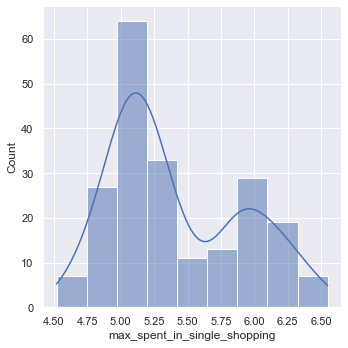

In [14]:
sns.displot(x=bankData['max_spent_in_single_shopping'], kind='hist', kde=True)
plt.show()

<AxesSubplot:xlabel='spending'>

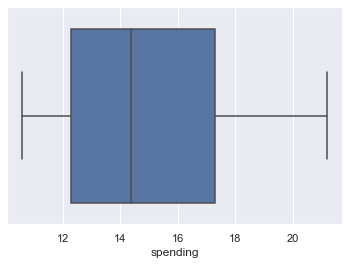

In [15]:
 sns.boxplot(x = bankData['spending'])

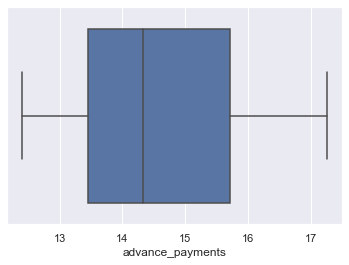

In [16]:
sns.boxplot(x = bankData['advance_payments'])
plt.show()

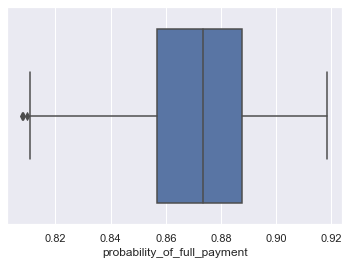

In [17]:
sns.boxplot(x = bankData['probability_of_full_payment'])
plt.show()

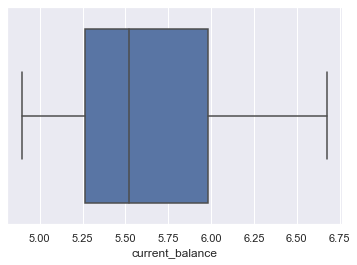

In [18]:
sns.boxplot(x = bankData['current_balance'])
plt.show()

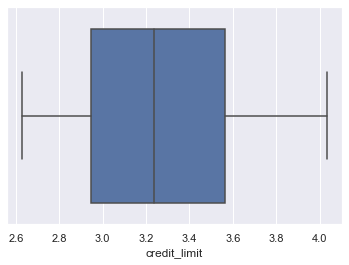

In [19]:
sns.boxplot(x = bankData['credit_limit'])
plt.show()

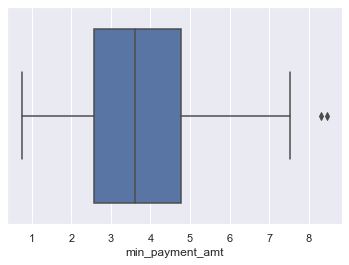

In [20]:
sns.boxplot(x = bankData['min_payment_amt'])
plt.show()

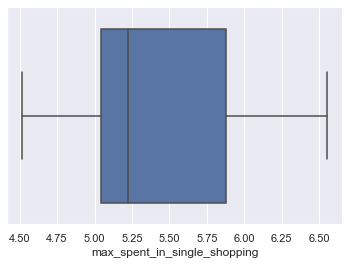

In [21]:
sns.boxplot(x = bankData['max_spent_in_single_shopping'])
plt.show()

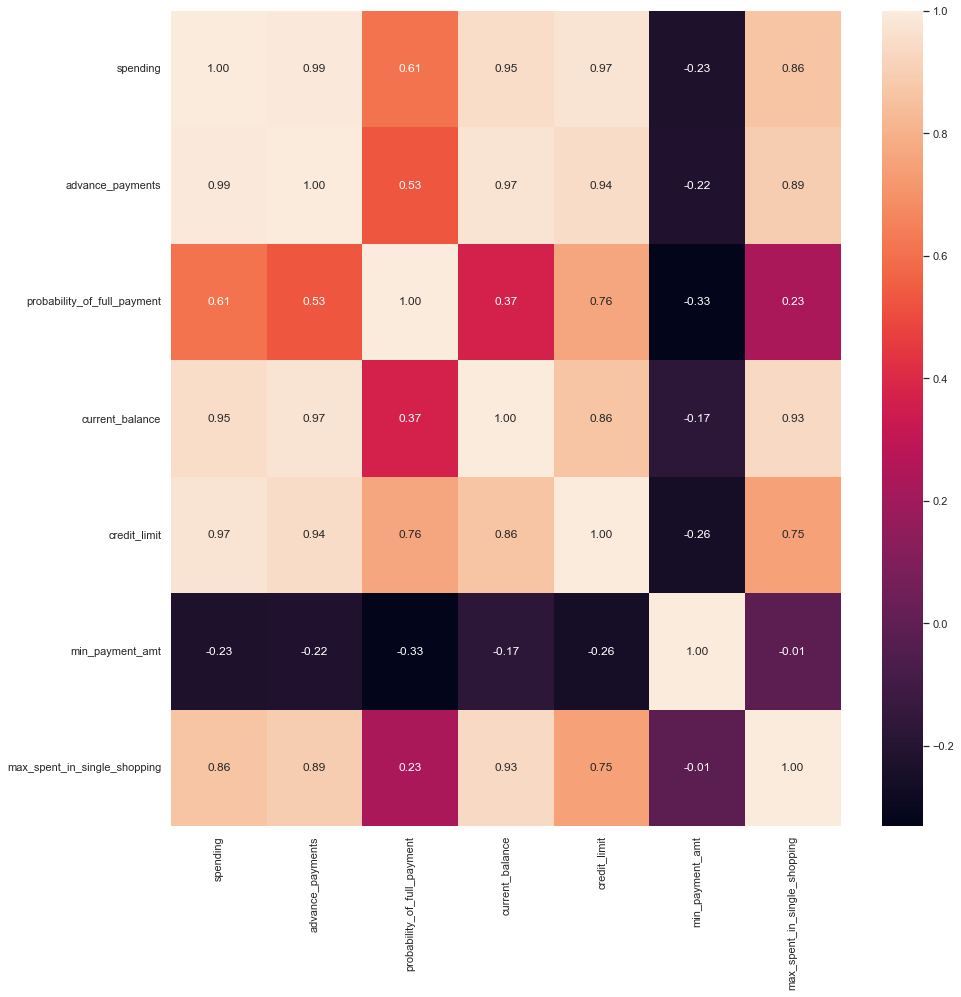

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(bankData.corr(),annot=True,fmt=".2f");

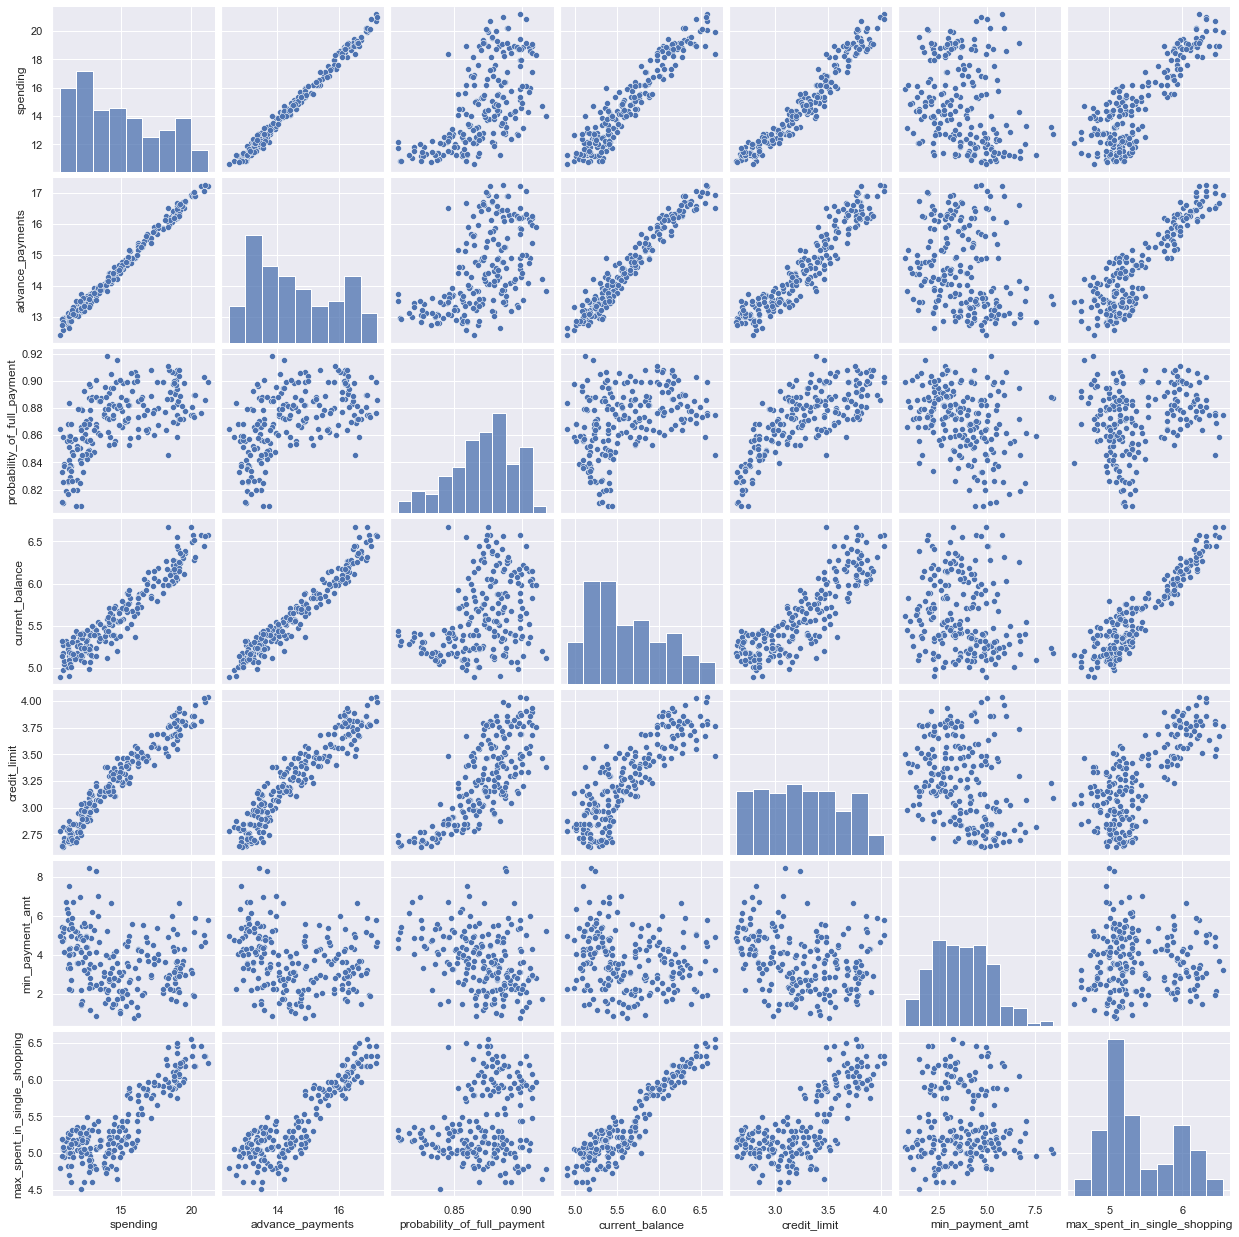

In [23]:
sns.pairplot(bankData)

In [24]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_bankData = X.fit_transform(bankData)
scaled_bankData

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

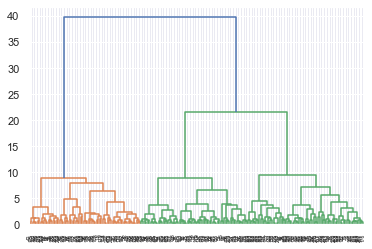

In [25]:
from scipy.cluster.hierarchy import dendrogram,linkage
wardlink = linkage(scaled_bankData, method='ward')
dend = dendrogram(wardlink)

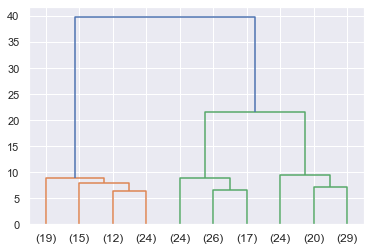

In [26]:
dend = dendrogram(wardlink, truncate_mode='lastp', p=10)

In [27]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(wardlink, 2, criterion = 'maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [28]:
clusters = fcluster(wardlink, 25, criterion = 'distance')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


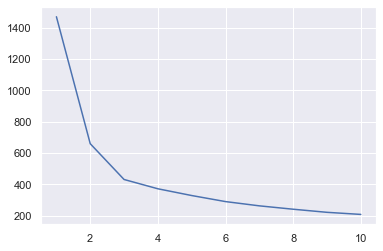

In [29]:
from sklearn.cluster import KMeans 
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_bankData)
    wss.append(KM.inertia_)
wss
plt.plot(range(1,11),wss)

In [325]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
X,Y = make_blobs()

no_of_clusters = [2,3,4,5,6]
silhouette_scr = []

for n_clusters in no_of_clusters:
    cluster = KMeans(n_clusters=n_clusters)
    cluster_labels = cluster.fit_predict(X)
    
    silhoutte_avg = silhouette_score(X, cluster_labels)
    silhouette_scr.append(silhoutte_avg)
    print("For cluster =", n_clusters," The average silhouette score is ",silhoutte_avg)

For cluster = 2  The average silhouette score is  0.5717487774387302
For cluster = 3  The average silhouette score is  0.6070196300166342
For cluster = 4  The average silhouette score is  0.5246588046460366
For cluster = 5  The average silhouette score is  0.4240344250329259
For cluster = 6  The average silhouette score is  0.3526583283998142


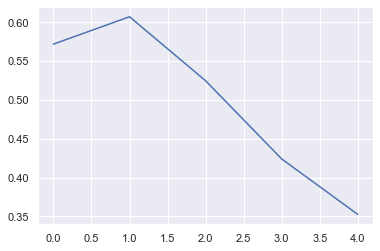

In [328]:
plt.plot(silhouette_scr)

In [329]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_bankData)
labels = k_means.labels_
bankData["Clus_kmeans"] = labels
print("The silhouette score is ",silhouette_score(scaled_bankData,labels))

The silhouette score is  0.40072705527512986


In [330]:
print("The silhouette width is", silhouette_samples(scaled_bankData,labels).min())

The silhouette width is 0.002713089347678376


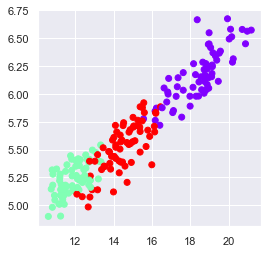

In [335]:
agc = KMeans(n_clusters = 3)
plt.figure(figsize =(4, 4))
plt.scatter(bankData['spending'], bankData['current_balance'], c = agc.fit_predict(scaled_bankData), cmap ='rainbow')

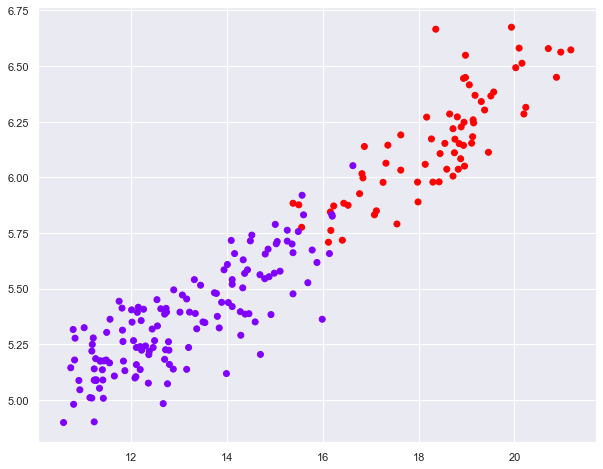

In [58]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(10, 8))
plt.scatter(bankData['spending'], bankData['current_balance'], c = agc.fit_predict(scaled_bankData), cmap ='rainbow')

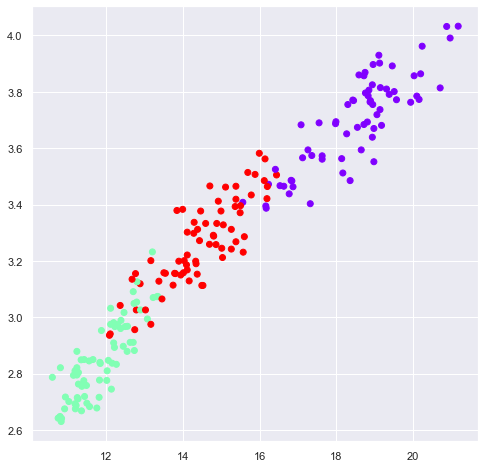

In [59]:
agc = KMeans(n_clusters = 3)
plt.figure(figsize =(8, 8))
plt.scatter(bankData['spending'], bankData['credit_limit'], c = agc.fit_predict(scaled_bankData), cmap ='rainbow')

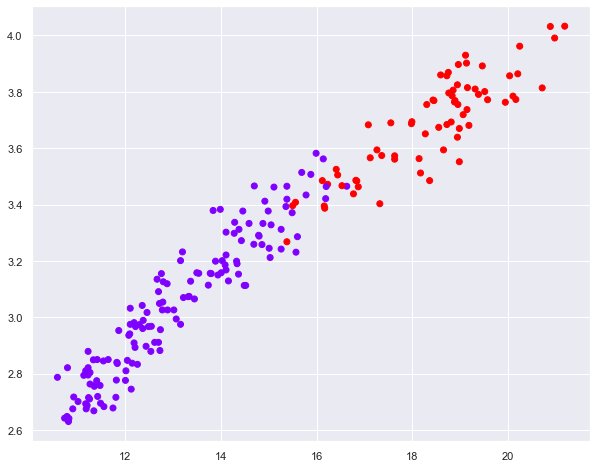

In [60]:
agc = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(10, 8))
plt.scatter(bankData['spending'], bankData['credit_limit'], c = agc.fit_predict(scaled_bankData), cmap ='rainbow')

In [61]:
bankData.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [67]:
k_means.cluster_centers_

array([[-1.03025257, -1.00664879, -0.9649051 , -0.89768501, -1.08558344,
         0.69480448, -0.62480856],
       [ 1.25668163,  1.26196622,  0.56046437,  1.23788278,  1.16485187,
        -0.04521936,  1.29230787],
       [-0.14111949, -0.17004259,  0.4496064 , -0.25781445,  0.00164694,
        -0.66191867, -0.58589311]])

In [68]:
bankData.to_csv('Updated_bnakData.csv')

In [195]:
insu_data = pd.read_csv('insurance_part2_data.csv')

In [196]:
insu_data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [197]:
insu_data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [198]:
insu_data.shape

(3000, 10)

In [199]:
insu_data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [200]:
insu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [201]:
insu_data = insu_data.drop(['Agency_Code'],axis=1)

In [202]:
insu_data.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


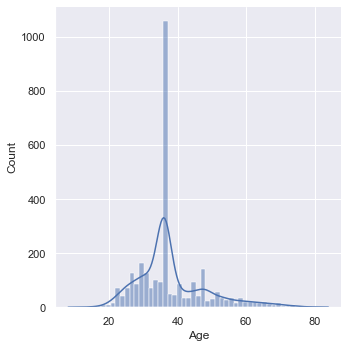

In [203]:
sns.displot(x=insu_data['Age'], kde=True)
plt.show()

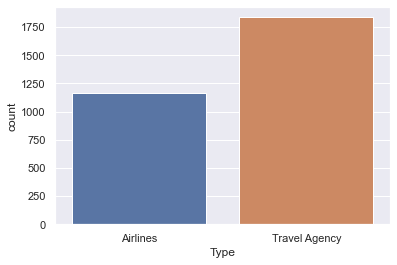

In [204]:
sns.countplot(x=insu_data['Type'])
plt.show()

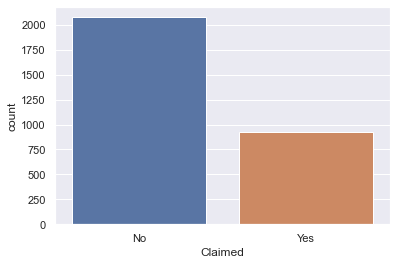

In [205]:
sns.countplot(x=insu_data['Claimed'])
plt.show()

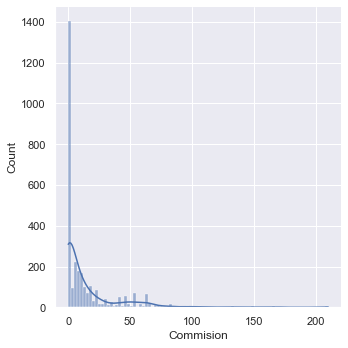

In [206]:
sns.displot(x=insu_data['Commision'], kde=True)
plt.show()

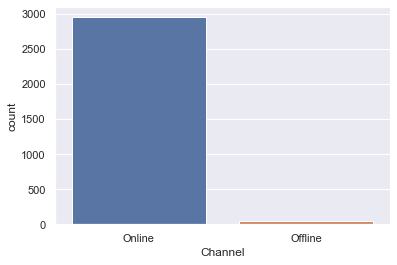

In [207]:
sns.countplot(x=insu_data['Channel'])
plt.show()

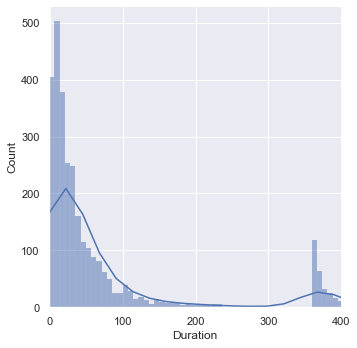

In [208]:
sns.displot(x=insu_data['Duration'], kde=True)
plt.xlim(-1,400)
plt.show()

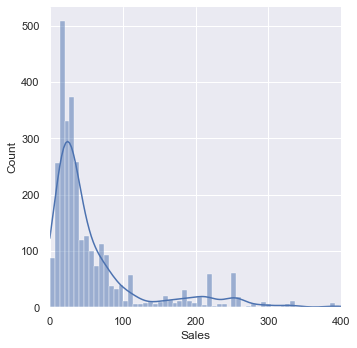

In [209]:
sns.displot(x=insu_data['Sales'], kde=True)
plt.xlim(-1,400)
plt.show()

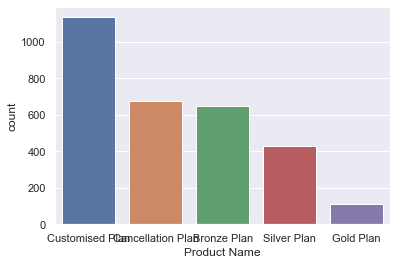

In [210]:
sns.countplot(x=insu_data['Product Name'])
plt.show()

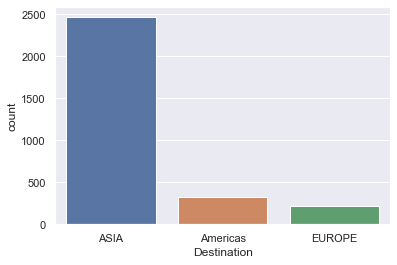

In [211]:
sns.countplot(x=insu_data['Destination'])
plt.show()

<AxesSubplot:xlabel='Age'>

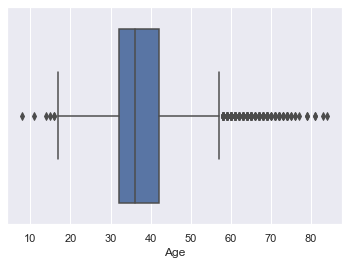

In [212]:
sns.boxplot(x = insu_data['Age'])

<AxesSubplot:xlabel='Commision'>

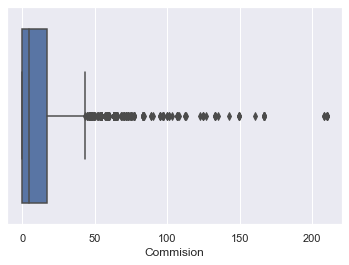

In [213]:
sns.boxplot(x = insu_data['Commision'])

<AxesSubplot:xlabel='Duration'>

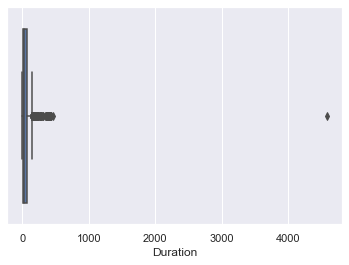

In [214]:
sns.boxplot(x = insu_data['Duration'])

<AxesSubplot:xlabel='Sales'>

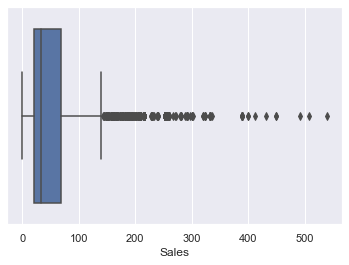

In [215]:
sns.boxplot(x = insu_data['Sales'])

In [216]:
Q1 = insu_data.quantile(0.25)
Q3 = insu_data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Age          10.000
Commision    17.235
Duration     52.000
Sales        49.000
dtype: float64


In [217]:
insu_data = insu_data[~((insu_data < (Q1-1.5 * IQR)) | (insu_data > (Q3+1.5 * IQR))).any(axis=1)]
insu_data.shape

C:\Users\DELL\AppData\Local\Temp/ipykernel_13756/2140559639.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  insu_data = insu_data[~((insu_data < (Q1-1.5 * IQR)) | (insu_data > (Q3+1.5 * IQR))).any(axis=1)]


(2278, 9)

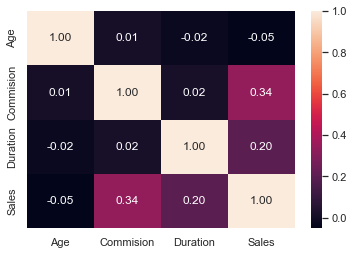

In [218]:
sns.heatmap(insu_data.corr(),annot=True,fmt=".2f");

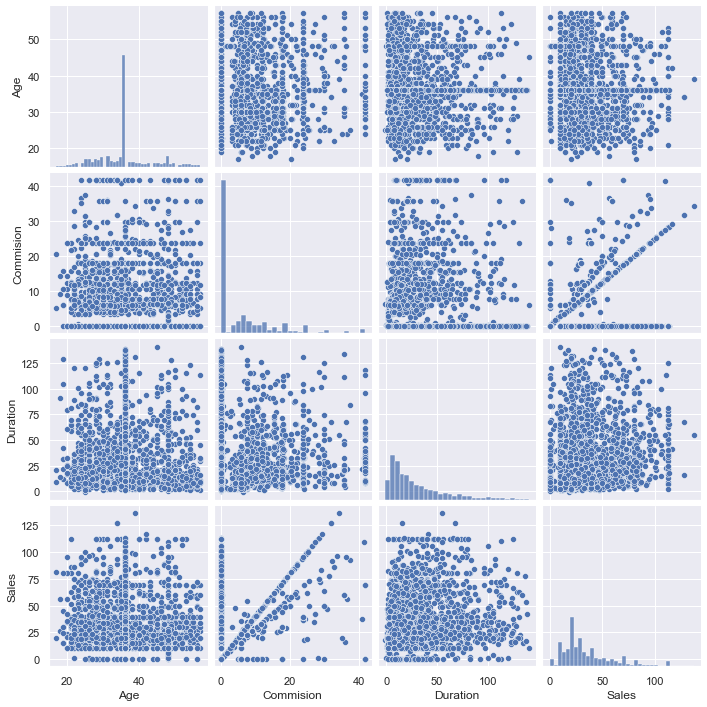

In [219]:
sns.pairplot(insu_data)

In [220]:
for feature in insu_data.columns:
    if insu_data[feature].dtype == 'object':
        insu_data[feature] = pd.Categorical(insu_data[feature]).codes

insu_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2278 non-null   int64  
 1   Type          2278 non-null   int8   
 2   Claimed       2278 non-null   int8   
 3   Commision     2278 non-null   float64
 4   Channel       2278 non-null   int8   
 5   Duration      2278 non-null   int64  
 6   Sales         2278 non-null   float64
 7   Product Name  2278 non-null   int8   
 8   Destination   2278 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 164.6 KB


In [221]:
insu_data.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,1,0,0.00,1,34,20.00,2,0
2,39,1,0,5.94,1,3,9.90,2,1
3,36,1,0,0.00,1,4,26.00,1,0
4,33,0,0,6.30,1,53,18.00,0,0


In [222]:
X = insu_data.drop(['Claimed'], axis=1)
y = insu_data.pop('Claimed')

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=10)

In [224]:
X_train.shape

(1594, 8)

In [225]:
X_test.shape

(684, 8)

In [226]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier()

In [232]:
from sklearn import tree

train_char_label = ['No','Yes']
insu_data_tree_file = open('C:/Users/DELL/Python/Data Mining/insu_tree.dot' , 'w')
dot_data = tree.export_graphviz(dt_model,out_file=insu_data_tree_file,feature_names=list(X_train), class_names=list(train_char_label))
insu_data_tree_file.close()

In [233]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ['Imp'], index = X_train.columns))

                   Imp
Age           0.168935
Type          0.095787
Commision     0.120000
Channel       0.001813
Duration      0.275545
Sales         0.270128
Product Name  0.035941
Destination   0.031850


In [234]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':[8,9,10],
    'min_samples_leaf':[15,20,25],
    'min_samples_split':[45,60,75]
}
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv =3)
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [236]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 45}

In [237]:
best_grid = grid_search.best_estimator_

In [240]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth=8, min_samples_leaf = 25, min_samples_split=45)
reg_dt_model.fit(X_train,train_labels)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=25, min_samples_split=45)

In [241]:
insu_data_tree_reg_file = open('C:/Users/DELL/Python/Data Mining/insu_tree_reg.dot' , 'w')
dot_data_reg = tree.export_graphviz(reg_dt_model,out_file=insu_data_tree_reg_file,feature_names=list(X_train), class_names=list(train_char_label))
insu_data_tree_reg_file.close()

In [342]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth':[6,7],
    'max_features':[4,5],
    'min_samples_leaf':[25,30],
    'min_samples_split':[20,30],
    'n_estimators':[101,301]
}
rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfcl,param_grid = param_grid, cv = 3)
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 7], 'max_features': [4, 5],
                         'min_samples_leaf': [25, 30],
                         'min_samples_split': [20, 30],
                         'n_estimators': [101, 301]})

In [343]:
rfcl

RandomForestClassifier()

In [344]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 25,
 'min_samples_split': 30,
 'n_estimators': 301}

In [345]:
best_grid_RF = grid_search.best_estimator_
best_grid_RF

RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=25,
                       min_samples_split=30, n_estimators=301)

In [248]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trains = sc.fit_transform(X_train)
X_tests = sc.fit_transform(X_test)

In [305]:
from sklearn.neural_network import MLPClassifier
param_grid = {
    'hidden_layer_sizes':[(500,500,500)],
    'activation':['logistic','relu'],
    'solver':['sgd','adam'],
    'tol':[1,0.1,0.01],
    'max_iter':[10000]
}
mlp = MLPClassifier()
grid_search = GridSearchCV(estimator = mlp,param_grid = param_grid, cv = 3)
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(500, 500, 500)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [1, 0.1, 0.01]})

In [306]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (500, 500, 500),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [341]:
best_grid_mlp = grid_search.best_estimator_
best_grid_mlp

MLPClassifier(hidden_layer_sizes=(500, 500, 500), max_iter=10000, tol=0.01)

In [252]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [253]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1204
           1       0.67      0.51      0.58       390

    accuracy                           0.82      1594
   macro avg       0.76      0.71      0.73      1594
weighted avg       0.81      0.82      0.81      1594



In [254]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       497
           1       0.61      0.41      0.49       187

    accuracy                           0.77       684
   macro avg       0.70      0.66      0.67       684
weighted avg       0.75      0.77      0.75       684



In [255]:
confusion_matrix(train_labels, ytrain_predict)

array([[1107,   97],
       [ 192,  198]], dtype=int64)

In [256]:
confusion_matrix(test_labels, ytest_predict)

array([[447,  50],
       [110,  77]], dtype=int64)

AUC: 0.839


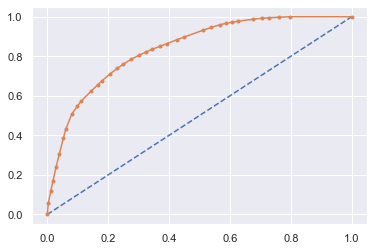

In [257]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.762


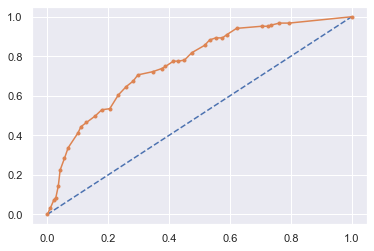

In [258]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [259]:
reg_dt_model.score(X_train,train_labels)

0.8186951066499373

In [260]:
reg_dt_model.score(X_test,test_labels)

0.7660818713450293

In [273]:
ytrain_predict_RF = best_grid_RF.predict(X_train)
ytest_predict_RF = best_grid_RF.predict(X_test)

In [274]:
print(classification_report(train_labels, ytrain_predict_RF))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1204
           1       0.71      0.43      0.53       390

    accuracy                           0.82      1594
   macro avg       0.77      0.68      0.71      1594
weighted avg       0.80      0.82      0.80      1594



In [275]:
print(classification_report(test_labels, ytest_predict_RF))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       497
           1       0.64      0.33      0.44       187

    accuracy                           0.77       684
   macro avg       0.71      0.63      0.64       684
weighted avg       0.75      0.77      0.74       684



In [276]:
confusion_matrix(train_labels, ytrain_predict_RF)

array([[1135,   69],
       [ 224,  166]], dtype=int64)

In [277]:
confusion_matrix(test_labels, ytest_predict_RF)

array([[462,  35],
       [125,  62]], dtype=int64)

AUC: 0.842


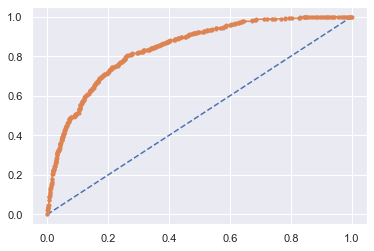

In [280]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_RF.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.805


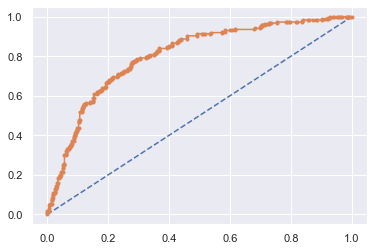

In [281]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_RF.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [308]:
ytrain_predict_mlp = best_grid_mlp.predict(X_train)
ytest_predict_mlp = best_grid_mlp.predict(X_test)

In [309]:
print(classification_report(train_labels, ytrain_predict_mlp))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1204
           1       0.68      0.34      0.46       390

    accuracy                           0.80      1594
   macro avg       0.75      0.65      0.67      1594
weighted avg       0.78      0.80      0.77      1594



In [310]:
print(classification_report(test_labels, ytest_predict_mlp))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       497
           1       0.62      0.33      0.43       187

    accuracy                           0.76       684
   macro avg       0.70      0.63      0.64       684
weighted avg       0.74      0.76      0.74       684



In [311]:
confusion_matrix(train_labels, ytrain_predict_mlp)

array([[1141,   63],
       [ 256,  134]], dtype=int64)

In [312]:
confusion_matrix(test_labels, ytest_predict_mlp)

array([[459,  38],
       [125,  62]], dtype=int64)

AUC: 0.788


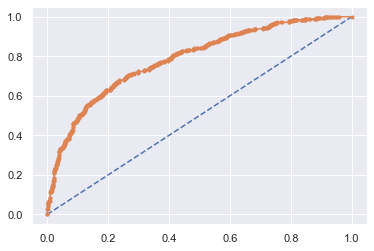

In [316]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_mlp.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.739


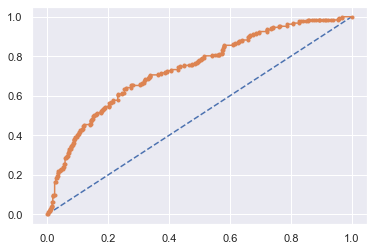

In [315]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()